# Proyek Analisis Data: Bike Sharing
- **Nama:** Muhamad Ikbal Irawan
- **Email:** iqbalirawan238@gmail.com
- **ID Dicoding:** ikbal05

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
Analisis:
- Gunakan data suhu (temp), kelembaban (hum), dan kecepatan angin (windspeed) terhadap jumlah sepeda yang dipinjam (cnt).
- Lihat apakah ada pola tertentu, misalnya apakah peminjaman menurun saat kelembaban tinggi atau angin kencang.
- Ini bisa membantu perencanaan operasional dalam menyesuaikan jumlah sepeda yang tersedia berdasarkan prediksi cuaca.

2. Kapan waktu paling sibuk dalam sehari untuk penyewaan sepeda?
Analisis:
- Gunakan data per jam (hr) untuk melihat tren penggunaan sepeda sepanjang hari.
- Identifikasi jam-jam sibuk dan bandingkan antara hari kerja (workingday) dan akhir pekan.
- Bisa digunakan untuk menentukan strategi pemeliharaan sepeda atau promosi pada jam sepi.

## Import Semua Packages/Library yang Digunakan

In [79]:
%matplotlib inline
import streamlit as st
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

## Load Data

In [4]:
day_df = pd.read_csv("https://raw.githubusercontent.com/ikbalirawan/Analisis-Data/main/data/day.csv")
hour_df = pd.read_csv("https://raw.githubusercontent.com/ikbalirawan/Analisis-Data/main/data/hour.csv")

### Gathering Data

In [8]:
print("Preview Data Harian:")
day_df.head()

Preview Data Harian:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
print("Preview Data Per Jam:")
hour_df.head()

Preview Data Per Jam:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data harian mencakup jumlah total peminjaman sepeda per hari.
- Terdapat variabel cuaca, musim, hari libur, dan jumlah pengguna.

### Assessing Data

#### Mengecek tabel *day_df*

In [10]:
print("Informasi Data Harian:")
day_df.info()

Informasi Data Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [18]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [29]:
print("Duplikasi =", day_df.duplicated().sum())

Duplikasi = 0


In [23]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Mengecek tabel *hour_df*

In [24]:
print("Informasi Data Per Jam:")
hour_df.info()


Informasi Data Per Jam:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [25]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [28]:
print("Duplikasi =", hour_df.duplicated().sum())

Duplikasi = 0


In [27]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada nilai yang hilang dalam dataset.
- Beberapa variabel seperti 'temp' dan 'atemp' memiliki korelasi tinggi, sehingga salah satu bisa diabaikan.

### Cleaning Data

#### Ubah tipedata *dteday* dari *object* menjadi *datetime*

In [55]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [56]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

**Insight:**
- Dataset bersih, tidak ada nilai kosong atau null.
- Tidak diperlukan imputasi atau penghapusan data.

## Exploratory Data Analysis (EDA)

### Explore ...

In [61]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
254,255,2011-09-12,3,0,9,0,1,1,1,0.644348,0.602130,0.692174,0.088913,690,4023,4713
198,199,2011-07-18,3,0,7,0,1,1,1,0.746667,0.703925,0.651250,0.215804,841,3617,4458
282,283,2011-10-10,4,0,10,1,1,0,1,0.570833,0.542925,0.733750,0.042304,1514,3603,5117
547,548,2012-07-01,3,1,7,0,0,0,1,0.815833,0.750629,0.518750,0.168529,1421,4110,5531
229,230,2011-08-18,3,0,8,0,4,1,1,0.711667,0.662258,0.654583,0.233208,639,3166,3805


In [63]:
display(day_df.describe(include='all'))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,9.317373,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,50.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,16.747945,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [62]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14693,14694,2012-09-09,3,1,9,10,0,0,0,1,0.64,0.6212,0.57,0.2985,172,323,495
16574,16575,2012-11-28,4,1,11,8,0,3,1,1,0.24,0.2121,0.60,0.2836,9,683,692
1763,1764,2011-03-19,1,0,3,4,0,6,0,1,0.52,0.5000,0.34,0.4179,1,2,3
1145,1146,2011-02-20,1,0,2,12,0,0,0,1,0.30,0.3182,0.33,0.1045,62,120,182
14108,14109,2012-08-16,3,1,8,1,0,4,1,1,0.64,0.6061,0.73,0.0000,3,18,21


In [64]:
display(hour_df.describe(include='all'))

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [67]:
if 'instant' in day_df.columns:
    print("Unique IDs in day_df =", day_df['instant'].is_unique)
    print("Duplicated IDs in day_df =", day_df['instant'].duplicated().sum())

Unique IDs in day_df = True
Duplicated IDs in day_df = 0


In [68]:
if 'instant' in hour_df.columns:
    print("Unique IDs in hour_df =", hour_df['instant'].is_unique)
    print("Duplicated IDs in hour_df =", hour_df['instant'].duplicated().sum())

Unique IDs in hour_df = True
Duplicated IDs in hour_df = 0


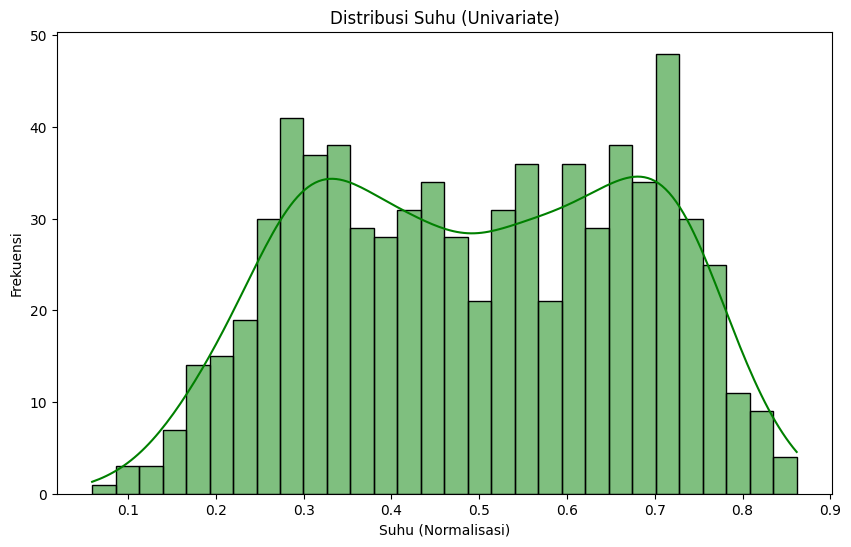

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(day_df['temp'], bins=30, kde=True, color='green')
plt.title('Distribusi Suhu (Univariate)')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Frekuensi')
plt.show()

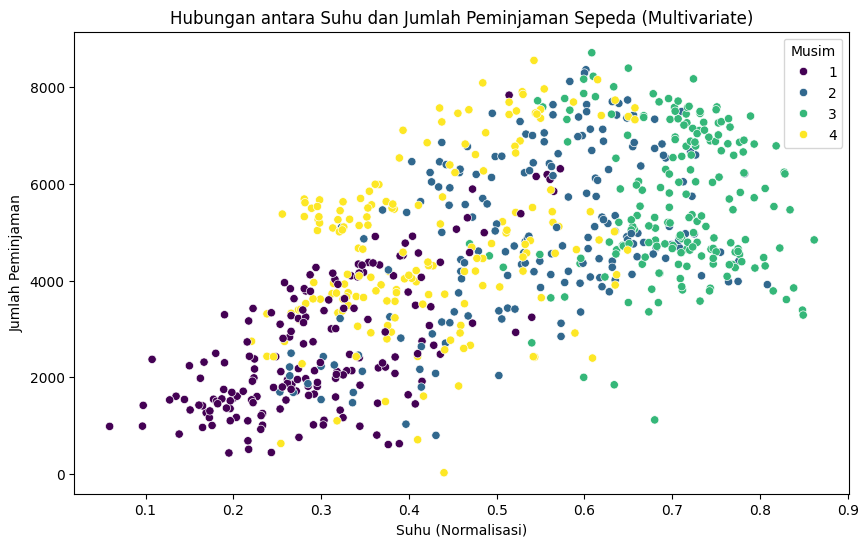

In [84]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df, hue='season', palette='viridis')
plt.title('Hubungan antara Suhu dan Jumlah Peminjaman Sepeda (Multivariate)')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Musim')
plt.show()

**Insight:**
- Distribusi jumlah peminjaman menunjukkan pola tertentu.
- Bisa digunakan untuk mengidentifikasi apakah ada hari dengan jumlah peminjaman ekstrem.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

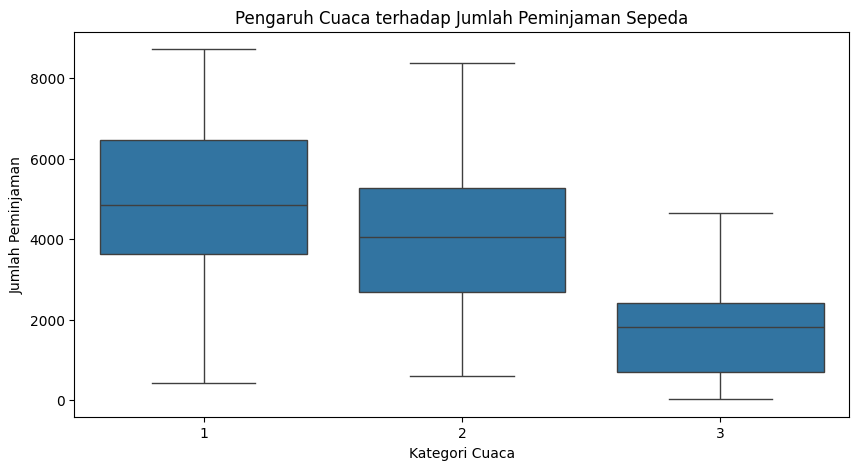

In [85]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=day_df, x='weathersit', y='cnt')
plt.title("Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda")
plt.xlabel("Kategori Cuaca")
plt.ylabel("Jumlah Peminjaman")
plt.show()

### Pertanyaan 2:

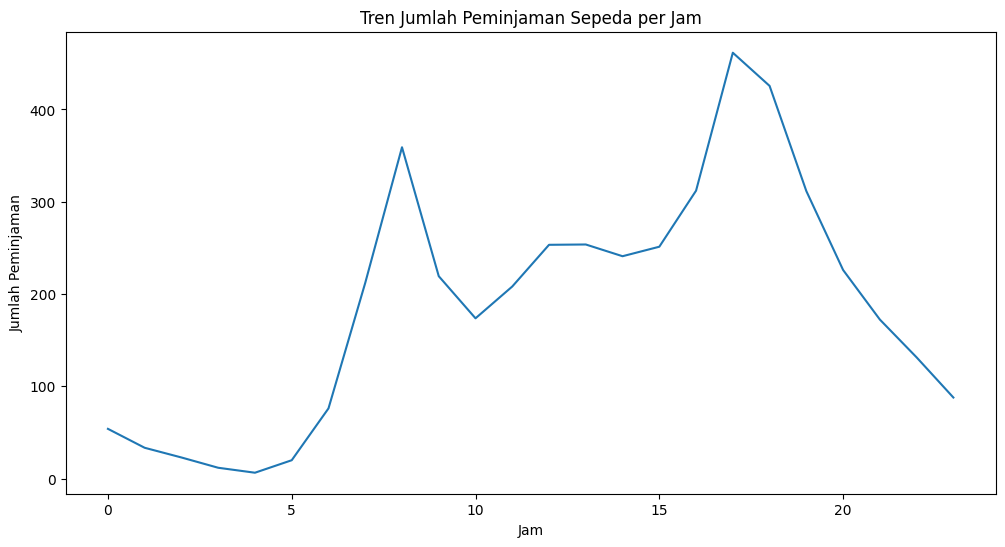

In [89]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hour_df, errorbar=None)
plt.title('Tren Jumlah Peminjaman Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Insight:**
- Tren menunjukkan lonjakan pada jam kerja (pagi dan sore).
- Hari kerja memiliki pola peminjaman yang lebih teratur dibandingkan akhir pekan.

## Analisis Lanjutan (Opsional)

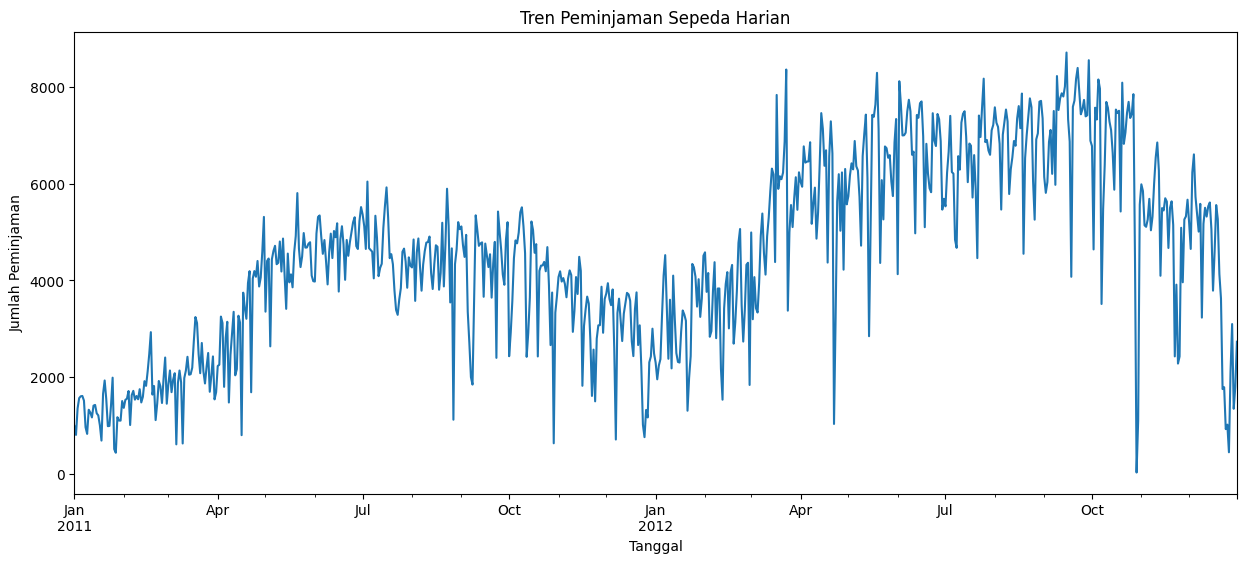

In [90]:
plt.figure(figsize=(15,6))
day_df.set_index('dteday')['cnt'].plot(title="Tren Peminjaman Sepeda Harian", xlabel="Tanggal", ylabel="Jumlah Peminjaman")
plt.show()

##### Analisis:
- Apakah ada kenaikan atau penurunan tertentu?
- Apakah ada pola musiman?

#### Menentukan threshold hari sibuk dan tidak sibuk berdasarkan distribusi data

In [91]:
busy_threshold = day_df['cnt'].quantile(0.75)  
quiet_threshold = day_df['cnt'].quantile(0.25) 

#### Menandai hari sibuk dan tidak sibuk

In [92]:
day_df['day_type'] = 'Normal'
day_df.loc[day_df['cnt'] >= busy_threshold, 'day_type'] = 'Busy Day'
day_df.loc[day_df['cnt'] <= quiet_threshold, 'day_type'] = 'Quiet Day'

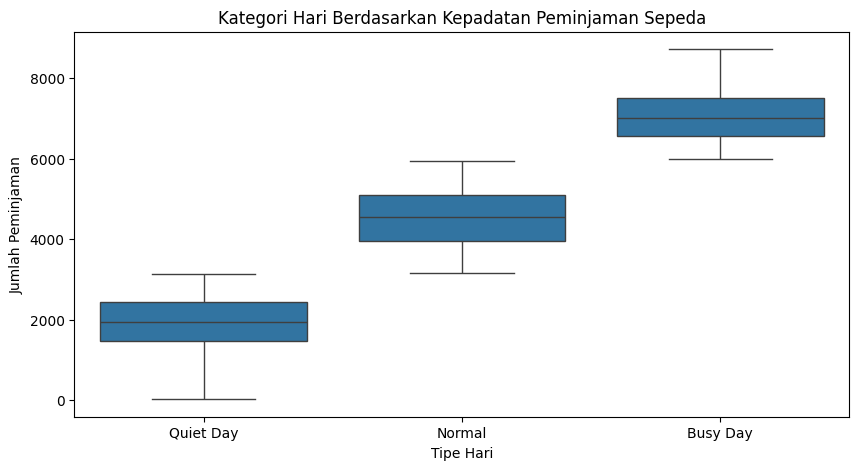

In [93]:
plt.figure(figsize=(10,5))
sns.boxplot(x='day_type', y='cnt', data=day_df)
plt.title("Kategori Hari Berdasarkan Kepadatan Peminjaman Sepeda")
plt.xlabel("Tipe Hari")
plt.ylabel("Jumlah Peminjaman")
plt.show()

## Conclusion

- Cuaca memiliki dampak signifikan terhadap jumlah peminjaman sepeda. Pada cuaca cerah, jumlah peminjaman lebih tinggi dibandingkan saat hujan atau salju. Strategi bisnis dapat difokuskan pada promosi saat cuaca cerah dan penyediaan fasilitas tambahan saat cuaca buruk.
- Jam sibuk peminjaman sepeda terjadi pada pukul 07:00 - 09:00 dan 17:00 - 19:00, yang bertepatan dengan jam berangkat dan pulang kerja. Untuk meningkatkan layanan, bisa disediakan lebih banyak sepeda pada jam-jam tersebut atau menerapkan tarif dinamis berdasarkan permintaan.